# Introduction to Principal Component Analysis

# What is PCA?

Principal component analysis (PCA) is a fast and flexible unsupervised method for dimensionality reduction in data.

PCA can be used to simplify the data with high dimensions (larger than 2) into 2-dimensional data by eliminating the least influntial features on the data. However, we should know the elimination of data makes the independent variable less interpretable.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA

## Step 1: Load the dataset

In an unsupervised learning approach, the first step is to visualize the data so get a sense or feel of what we are working on.

We plot our data using scatterplots in either 2 dimensions or 3 dimensions to see any patterns or groupings that is currently in our data.

Unfortunately, this approach will not work because most real world datasets more than 3 dimensions.

As an example, let's use the famous iris dataset, which has the following 4 dimensions:
 * Sepal Length
 * Sepal Width
 * Pedal Length
 * Pedal Width

In [2]:
iris = datasets.load_iris(as_frame=True)

X = iris.data
y = iris.target
target_names = iris.target_names

This dataset is made of 4 features/dimensions: sepal length, sepal width, petal length, petal width.

In [3]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step 2: Use PCA to for reduce the dimensions

Dimensions of iris data set before PCA

In [4]:
X.shape

(150, 4)

We use PCA to project this 4 feature space into a 2-dimensional space.

In [5]:
pca = PCA(n_components=2)
X_principal = pca.fit(X).transform(X)

Dimensions of iris data set after PCA

In [6]:
X_principal.shape

(150, 2)

## Step 3: Display the explained variances of each principal component using a Scree Plot

In [7]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

Explained variance of PC1 0.9246187232017327
Explained variance of PC2 0.05306648311706482


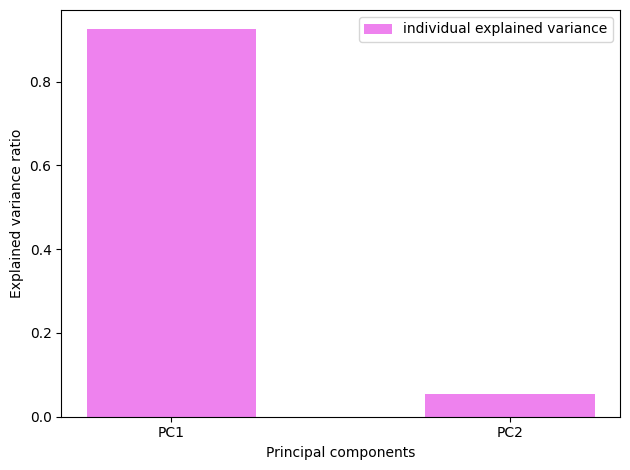

In [8]:
plt.figure()
principalcomponents = ['PC1', 'PC2']

plt.bar(principalcomponents, explained_variance, width=0.5, label='individual explained variance', color='violet')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## Step 4: Plot the features after doing PCA

In [9]:
PC_df = pd.DataFrame({'PC1': X_principal[:, 0], 'PC2': X_principal[:, 1]})
PC_df.head()

,PC1,PC2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


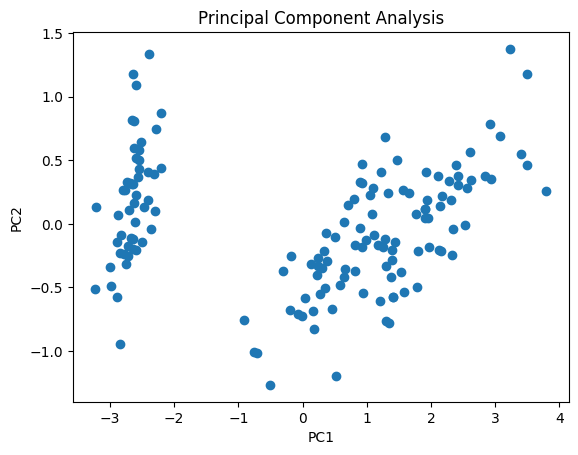

In [10]:
plt.figure()
plt.scatter(PC_df['PC1'], PC_df['PC2'])
plt.title('Principal Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Step 5: Get the loadings

Each feature will get a weight or loading that indicate the how much it contributes to a specific principal component (PC)

In [11]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=iris.feature_names)
loading_matrix

,PC1,PC2
sepal length (cm),0.743108,0.323446
sepal width (cm),-0.173801,0.359689
petal length (cm),1.761545,-0.085406
petal width (cm),0.736739,-0.037183


## Step 6: Use a clustering algorithm

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300,
                  n_init = 10, random_state = 0)
kmeans.fit(PC_df)
labels = kmeans.labels_  # Cluster labels for each point
centroids = kmeans.cluster_centers_  # Cluster centroids

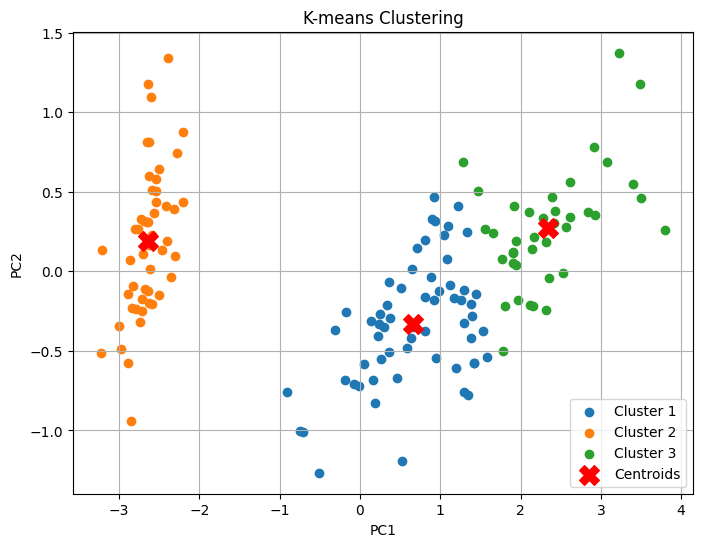

In [13]:
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming 3 clusters
    cluster_points = X_principal[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()